PCA_Try1

In [107]:
"""
Imports
"""

import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
import bokeh
import bokeh.charts as bch
from bokeh.models import Legend
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# Display graphics in this notebook
bokeh.io.output_notebook()
TOOLS = [BoxSelectTool(), HoverTool()]

output_notebook()

Loading BokehJS ...

Loading BokehJS ...

**Data**

In [141]:
# df = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/hor_sizeBin.csv')
df = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/combined_data.csv')
df2 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/combined_data.csv')

In [112]:
df.drop(['GTcons'], axis=1, inplace = True)

In [113]:
df['chrom'].replace('X', 23, inplace=True)
df['chrom'].replace('Y', 24, inplace=True)

**Impute Missing Values**

In [114]:
X = df
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)
df_header = list(df.columns.values)
X.columns = df_header
X.head(3)

Imputing row 1/5835 with 22 missing, elapsed time: 35.090
Imputing row 101/5835 with 1 missing, elapsed time: 35.103
Imputing row 201/5835 with 1 missing, elapsed time: 35.109
Imputing row 301/5835 with 1 missing, elapsed time: 35.120
Imputing row 401/5835 with 1 missing, elapsed time: 35.127
Imputing row 501/5835 with 1 missing, elapsed time: 35.140
Imputing row 601/5835 with 1 missing, elapsed time: 35.148
Imputing row 701/5835 with 1 missing, elapsed time: 35.160
Imputing row 801/5835 with 1 missing, elapsed time: 35.171
Imputing row 901/5835 with 0 missing, elapsed time: 35.214
Imputing row 1001/5835 with 0 missing, elapsed time: 35.219
Imputing row 1101/5835 with 0 missing, elapsed time: 35.225
Imputing row 1201/5835 with 0 missing, elapsed time: 35.235
Imputing row 1301/5835 with 0 missing, elapsed time: 35.240
Imputing row 1401/5835 with 0 missing, elapsed time: 35.253
Imputing row 1501/5835 with 0 missing, elapsed time: 35.262
Imputing row 1601/5835 with 0 missing, elapsed time

,index,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,New_ID
0,0.0,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,...,1337.095758,12.635987,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979,880.0
1,1.0,988.000000,4.992302,26.0,449.000000,98.968526,23.0,3.0,0.0,888.428571,...,4504.705061,26.000000,0.0,0.0,0.0,0.000000,96139975.0,2.0,0.014487,881.0
2,2.0,956.666667,34.439964,18.0,408.277778,67.678000,18.0,0.0,0.0,865.890351,...,3520.607336,17.000000,0.0,0.0,0.0,0.000000,109690878.0,1.0,0.400000,882.0


In [115]:
df = X

**PCA**

[PCA Note - Digits Example](https://youtu.be/Rjz3OfmnhUU?t=436)

In [116]:
# Standardize Data
# Transformation of the data onto unit scale (mean=0 and variance=1)
df_std = StandardScaler().fit_transform(df)
df_std.shape

(5835, 178)

In [117]:
# # Another way to normalize data
# # normalize data
# df_norm = (df - df.mean()) / df.std()

In [118]:
# Determine the number of components that explain 98% of the varaince in the data
clf = PCA(0.95)
X_tran = clf.fit_transform(df_std)
print('Number of components that explain 95% of the variance: {:.1f}'.format(clf.n_components_)) 

Number of components that explain 95% of the variance: 88.0


In [119]:
print ('This means that {:.1f} components can be ignored'.format(175-(clf.n_components_)))

This means that 87.0 components can be ignored


In [120]:
pca=PCA(n_components=87)
pca.fit_transform(df_std)
pca

PCA(copy=True, iterated_power='auto', n_components=87, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

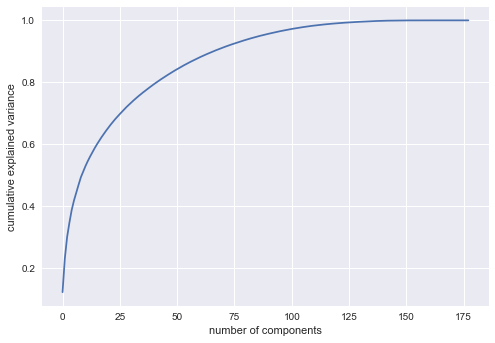

In [121]:
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**PCA: Features the explain variance **

In [122]:
pca2=PCA(n_components=2)
c = pca2.fit(df_std)
d = c.components_
df_d = pd.DataFrame(d[:,:])
df10 = df_d.T
df10.index=X.columns

In [123]:
df10.rename(columns={0: 'PC-1'}, inplace=True)
df10.rename(columns={1: 'PC-2'}, inplace=True)
df10['PC-1'] = df10['PC-1'].abs()
df10['PC-2'] = df10['PC-2'].abs()
df11 = df10.sort('PC-1', ascending=False)
df11

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,PC-1,PC-2
pacbio.alt_count,0.173830,0.032344
pacbio.alt_reason_alignmentScore,0.173830,0.032344
pacbio.alt_alnScore_std,0.167489,0.023965
Ill250.alt_alnScore_mean,0.166844,0.028574
pacbio.alt_insertSize_std,0.166533,0.023592
pacbio.ref_reason_alignmentScore,0.164419,0.029502
pacbio.ref_count,0.164419,0.029502
Ill250.alt_insertSize_mean,0.162179,0.027733
Ill250.alt_insertSize_std,0.161986,0.032653
Ill250.alt_count,0.154827,0.091082


**TSNE**

In [124]:
ncomps = 87
pca=PCA(n_components=ncomps)
Y = pca.fit_transform(df_std)
dfpca = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [125]:
tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfpca)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfpca.index)

In [126]:
#Size Bins
bins = [20,50,100,300,400,500,1000,6000,500000]
df['Size'] = df['Size'].abs()
group_names_size = ['20-49', '50-99', '100-299', '300-399', '400-499', '500-999', '1000-5999', '6000+']
df['size_bin'] = pd.cut(df['Size'], bins, labels=group_names_size)
dftsne['size_bin'] = df['size_bin']

In [127]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', title='HG002 DEL:Size', legend="top_left")
show(p)

In [128]:
#PB Alt Count Bins
df['pacbio.alt_count'].replace(-1, 0, inplace=True)
# df.sort('pacbio.alt_count', ascending=False)
bins = [-1,25, 50, 75, 100]
group_names_size = ['0-25', '25-50', '50-75', '75-100']
df['pacbio.alt_count_bin'] = pd.cut(df['pacbio.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['PB_altcount'] = df['pacbio.alt_count_bin']

In [129]:
dftsne.head(1)

,x,y,size_bin,PB_altcount
0,11.083828,-6.986009,6000+,25-50


In [130]:
p = Scatter(dftsne, x='x', y='y', color='PB_altcount', title='Pacbio Alt Count', legend="top_left")
show(p)

In [131]:
df.to_csv('df123.csv', index=False)

In [132]:
#PB Alt Count Bins
df['pacbio.alt_count'].replace(-1, 0, inplace=True)
# df.sort('pacbio.alt_count', ascending=False)
bins = [-1,25, 50, 75, 100]
group_names_size = ['0-25', '25-50', '50-75', '75-100']
df['pacbio.alt_count_bin'] = pd.cut(df['pacbio.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['PB_altcount'] = df['pacbio.alt_count_bin']

In [134]:
#Ill250 : alt_alnScore_mean
bins = [0,25,50, 100, 500, 1000]
group_names_size = ['0-25', '25-50', '50-100', '100-500', '500-1000']
df['Ill250.alt_alnScore_mean_bin'] = pd.cut(df['Ill250.alt_alnScore_mean'], bins, labels=group_names_size)
dftsne['Ill250'] = pd.cut(df['Ill250.alt_alnScore_mean'], bins, labels=group_names_size)

In [148]:
#Ill250 Alt Count
bins = [-1,25, 50, 75, 100, 500, 1000]
group_names_size = ['0-25', '25-50', '50-75', '75-100', '100-500', '500-1000']
df['Ill250.alt_count_bin'] = pd.cut(df['Ill250.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['Ill250alt_count'] = df['Ill250.alt_count_bin']

In [150]:
p = Scatter(dftsne, x='x', y='y', color='Ill250alt_count', title='Ill250 : Alt Count', legend="top_left")
show(p)

In [90]:
dftsne.to_csv('df123.csv',index=False)

In [136]:
# DBSCAN with tSNE data
dbscan = DBSCAN()
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [146]:
dbscan = DBSCAN(min_samples=10)
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels


df['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]


In [138]:
p = Scatter(dftsne, x='x', y='y', color='clusterLabel', title='Clusters', legend="top_left")
show(p)

In [102]:
output_notebook()

Loading BokehJS ...

In [ ]:
sns.set_style("white")


In [ ]:

g = sns.lmplot("x", "y", data=dftsne, hue='clusterLabel', fit_reg=False, scatter_kws={"marker": "D","s": 12}, legend=True, size=8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(g)

In [ ]:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [142]:
dftsne['Size'] = df['Size'].abs()
dftsne['GTcons'] = df2['GTcons']

In [155]:
#Specify data source
source = bokeh.models.ColumnDataSource(dftsne)
# What pops up on hover?
tooltips = [('clusterLabel', '@clusterLabel'),
           ('Size', '@Size')]

# Make the hover tool
hover = bokeh.models.HoverTool(tooltips=tooltips)

# Create figure
p = bokeh.plotting.figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)

p.xgrid.grid_line_color = 'white'
p.ygrid.grid_line_color = 'white'

# Add the hover tool
p.add_tools(hover)

# Populate glyphs
# p.scatter(x='x', y='y', color='Tech_Label_Agreement', size=7, alpha=0.5, source=source)

# bokeh.io.show(p)

scatter = bch.Scatter(dftsne, x='x', y='y',
                      color='clusterLabel',
                      legend=False,
                      palette=palettes.Category20[20],
                      tooltips=tooltips)

bch.show(scatter)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:

Plot.background_fill was deprecated in Bokeh 0.11.0 and will be removed, use Plot.background_fill_color instead.



In [153]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', palette=palettes.Category20[20], title='Size', legend="top_left")
show(p)

In [152]:
#Specify data source
source = bokeh.models.ColumnDataSource(dftsne)
# What pops up on hover?
tooltips = [('clusterLabel', '@clusterLabel'),
           ('Size', '@Size')]

# Make the hover tool
hover = bokeh.models.HoverTool(tooltips=tooltips)

# Create figure
p = bokeh.plotting.figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)

p.xgrid.grid_line_color = 'white'
p.ygrid.grid_line_color = 'white'

# Add the hover tool
p.add_tools(hover)

# Populate glyphs
# p.scatter(x='x', y='y', color='Tech_Label_Agreement', size=7, alpha=0.5, source=source)

# bokeh.io.show(p)

scatter = bch.Scatter(dftsne, x='x', y='y',
                      color='size_bin',
                      legend=False,
                      palette=palettes.Category20[20],
                      tooltips=tooltips)

bch.show(scatter)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:

Plot.background_fill was deprecated in Bokeh 0.11.0 and will be removed, use Plot.background_fill_color instead.



In [171]:
df2['Cluster_Labels'] = dftsne['clusterLabel']

In [172]:
# df2.drop(['Cluster_Labels'], axis=1, inplace = True)

In [173]:
df2.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/Data_Cluster.csv', index=False)

In [174]:
df3 = pd.value_counts(df2['Cluster_Labels'].values, sort=False)

In [175]:
df4 = pd.DataFrame(df3)
df4['ClusterID'] = df4.index
df4.rename(columns={0: 'Cluster_Count'}, inplace=True)
df4.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/tsne_clusterCount.csv', index=False)